In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv("flight_fare.csv")
df

,Unnamed: 0,Flight name,Departure_time,Arrival_time,Price,Source,Destination,Duration,No of stop,Date
0,0,Air Asia,20:45,01:45,7486,Bengaluru,Delhi,5h,1,2021-11-28
1,1,Air Asia,23:10,10:05,7486,Bengaluru,Delhi,10h 55m,1,2021-11-28
2,2,Air Asia,22:55,10:05,7486,Bengaluru,Delhi,11h 10m,1,2021-11-28
3,3,Go First,21:00,23:50,7487,Bengaluru,Delhi,2h 50m,Non,2021-11-28
4,4,SpiceJet,21:55,00:35,7488,Bengaluru,Delhi,2h 40m,Non,2021-11-28
...,...,...,...,...,...,...,...,...,...,...
9528,9528,Air India,09:40,23:35,10730,Kolkata,Hyderabad,13h 55m,2,2022-01-07
9529,9529,Vistara,15:20,22:55,10826,Kolkata,Hyderabad,7h 35m,1,2022-01-07
9530,9530,Air India,20:30,10:30,14469,Kolkata,Hyderabad,14h,1,2022-01-07
9531,9531,Air India,20:30,11:55,14469,Kolkata,Hyderabad,15h 25m,1,2022-01-07


In [3]:
#checking shape of dataset
print("The no. of Rows in dataset is: ",df.shape[0],"and no. of columns is ",df.shape[1])

The no. of Rows in dataset is:  9533 and no. of columns is  10


In [4]:
#checking datatype of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      9533 non-null   int64 
 1   Flight name     9533 non-null   object
 2   Departure_time  9533 non-null   object
 3   Arrival_time    9533 non-null   object
 4   Price           9533 non-null   int64 
 5   Source          9533 non-null   object
 6   Destination     9533 non-null   object
 7   Duration        9533 non-null   object
 8   No of stop      9533 non-null   object
 9   Date            9533 non-null   object
dtypes: int64(2), object(8)
memory usage: 744.9+ KB


In [5]:
#checking null value
df.isnull().sum()

Unnamed: 0        0
Flight name       0
Departure_time    0
Arrival_time      0
Price             0
Source            0
Destination       0
Duration          0
No of stop        0
Date              0
dtype: int64

In [6]:
#checking basic info 
df.describe()

,Unnamed: 0,Price
count,9533.000000,9533.000000
mean,4766.000000,8419.857338
std,2752.084392,4229.912447
min,0.000000,1604.000000
25%,2383.000000,5471.000000
50%,4766.000000,7521.000000
75%,7149.000000,10562.000000
max,9532.000000,48217.000000


In [7]:
#checking unique in dataset
df.nunique().sort_values()

Source               2
Destination          4
Flight name          6
No of stop           6
Date                10
Departure_time     175
Arrival_time       216
Duration           372
Price             2537
Unnamed: 0        9533
dtype: int64

<AxesSubplot:>

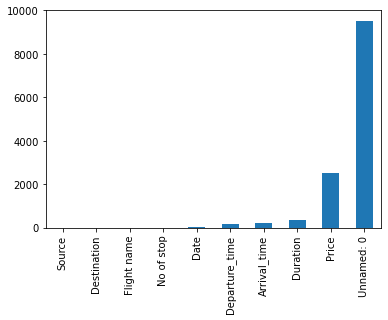

In [8]:
#checking unique in dataset
df.nunique().sort_values().plot.bar()

## EDA

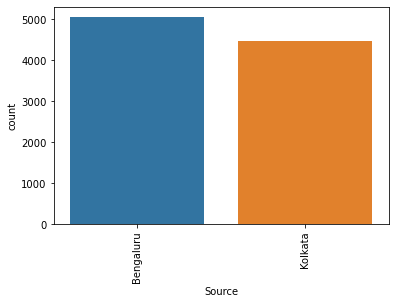

In [9]:
sns.countplot(df["Source"],data=df)
plt.xticks(rotation=90)
plt.show()

for both the location the flight ratio is same

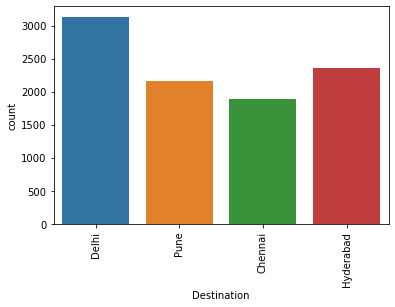

In [10]:
sns.countplot(df["Destination"],data=df)
plt.xticks(rotation=90)
plt.show()

we see that for delhi destination we have more flight as compare to other places

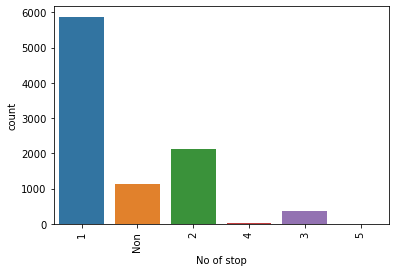

In [11]:
sns.countplot(df["No of stop"],data=df)
plt.xticks(rotation=90)
plt.show()

most of the flights are one stop flight and generally people prefer hault in journey

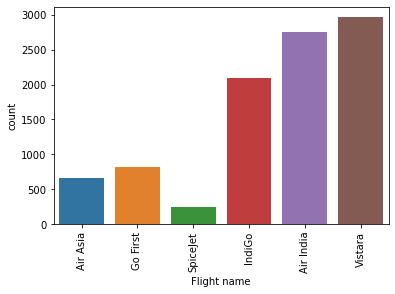

In [12]:
sns.countplot(df["Flight name"],data=df)
plt.xticks(rotation=90)
plt.show()

as we can see vistara has currently most no of flights running

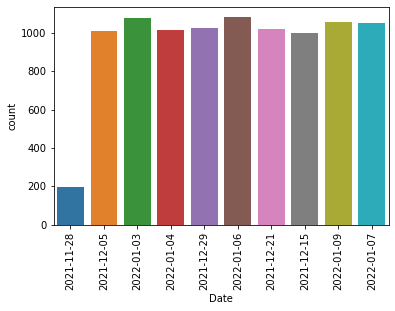

In [13]:
sns.countplot(df["Date"],data=df)
plt.xticks(rotation=90)
plt.show()

for all the dates the flight are equal

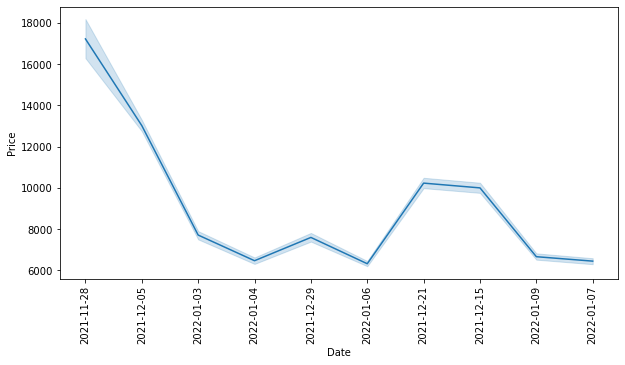

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(df["Date"],df["Price"])
plt.xticks(rotation=90)
plt.show()

we can see that last minute flight are expensive or the flight whuch is near some festive occasion are expensive

<AxesSubplot:xlabel='Price', ylabel='Density'>

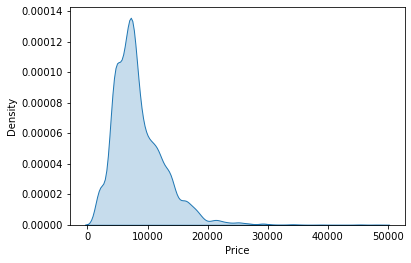

In [15]:
sns.kdeplot(df["Price"],data=df,fill=True)

price is slightly right skewed

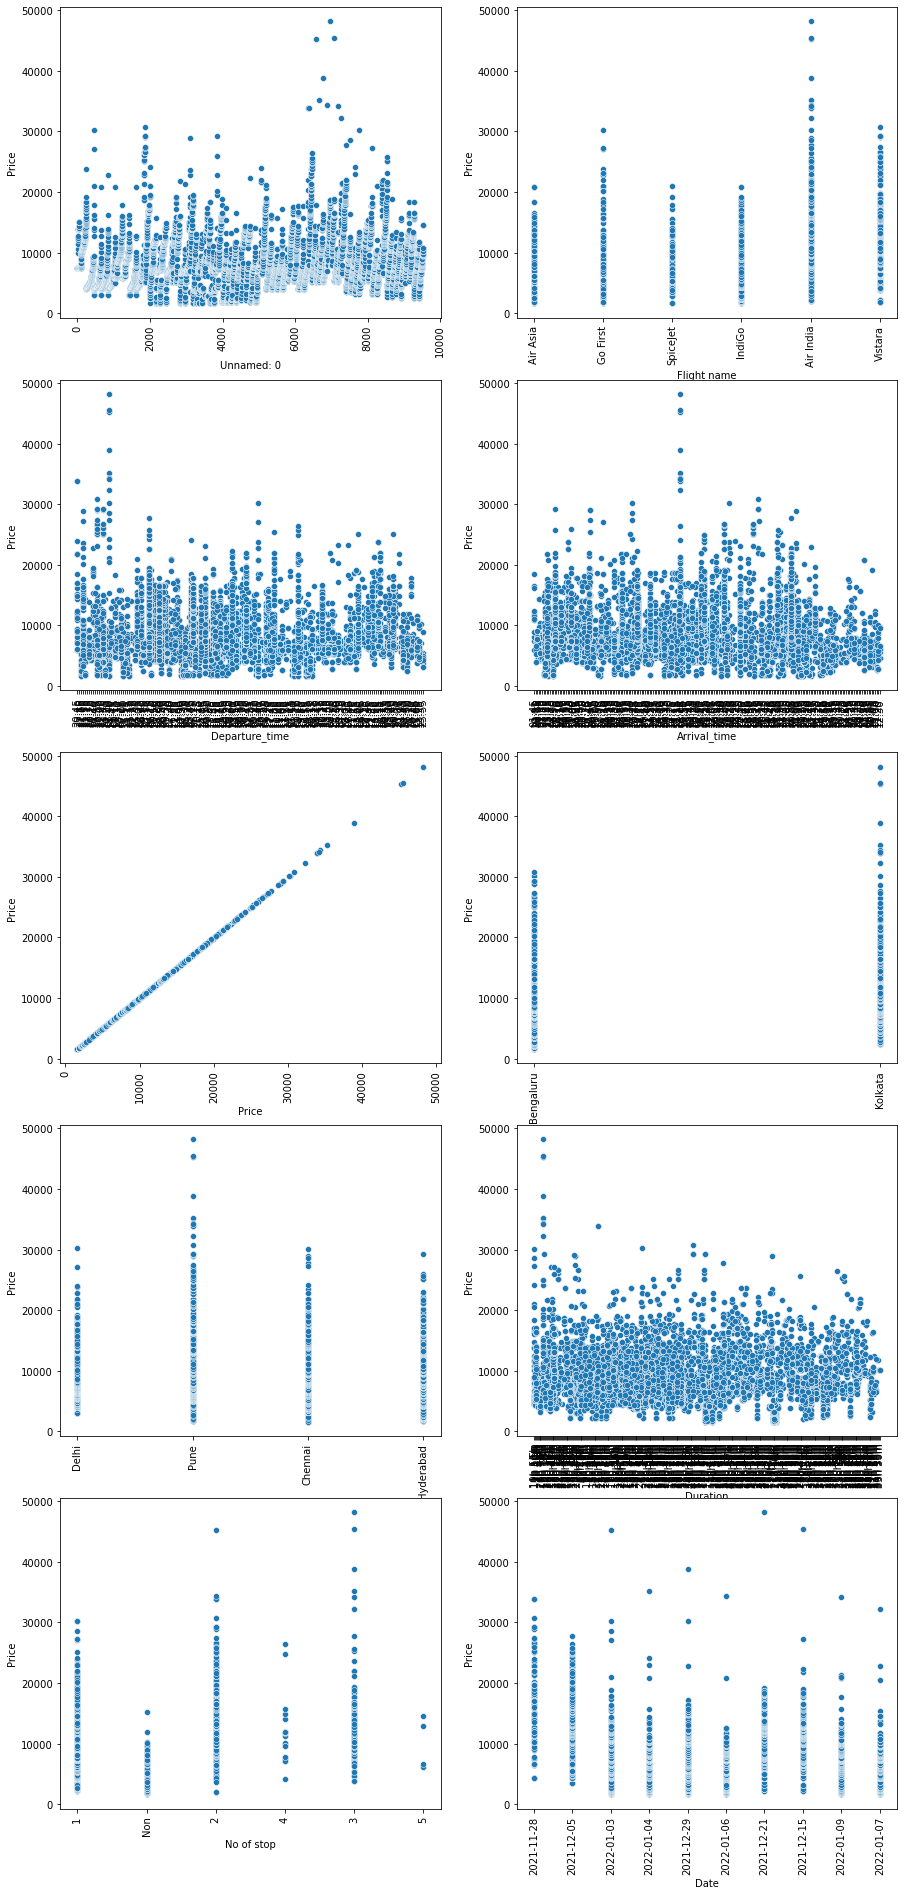

In [18]:
#bivariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.scatterplot(df[i],df["Price"])
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

air india have maximun travel price as compare to other flights

3 stop flight hsvr high fare as compare to other stops

flight to pune have maximum fare may be it is travelling by diferent route and haulting a bit in between

early morning flight are expensive as compare to afternoon flight

In [19]:
#splitting date into date and month 
df["Date"]= pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month

In [20]:
#splitting daparture time and arrival time
df["Departure_time"] = pd.to_datetime(df["Departure_time"])

df["dep_hour"] = df["Departure_time"].dt.hour

df["dep_min"] = df["Departure_time"].dt.minute

In [21]:
df["Arrival_time"] = pd.to_datetime(df["Arrival_time"])
df['Arr_hour'] = df["Arrival_time"].dt.hour
df['Arr_min'] = df["Arrival_time"].dt.minute

In [22]:
#dropping unwanted columns
df.drop(["Date","Departure_time","Arrival_time","Unnamed: 0"],axis=1,inplace=True)

In [23]:
# splitting duration into and hour and min in seperate column for better understanding
s=pd.to_timedelta(df['Duration'])
df['hours']=s.dt.components['hours']
df['minutes']=s.dt.components['minutes']

In [24]:
df.drop(["Duration"],inplace=True,axis=1)

In [25]:
# replacing non with 0 to make it a discrete column as model will not understan non
df["No of stop"] = df["No of stop"].replace("Non",0)

In [26]:
#chaning datatype of int
df["No of stop"]= df["No of stop"].astype("int64")

In [27]:
#replacing source manually with 1 and 2
df["Source"] = df["Source"].replace("Bengaluru",1)
df["Source"] = df["Source"].replace("Kolkata",2)

In [28]:
#verifying datatype is correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  9533 non-null   object
 1   Price        9533 non-null   int64 
 2   Source       9533 non-null   int64 
 3   Destination  9533 non-null   object
 4   No of stop   9533 non-null   int64 
 5   Day          9533 non-null   int64 
 6   Month        9533 non-null   int64 
 7   dep_hour     9533 non-null   int64 
 8   dep_min      9533 non-null   int64 
 9   Arr_hour     9533 non-null   int64 
 10  Arr_min      9533 non-null   int64 
 11  hours        9533 non-null   int64 
 12  minutes      9533 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 968.3+ KB


## label encoding

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  9533 non-null   object
 1   Price        9533 non-null   int64 
 2   Source       9533 non-null   int64 
 3   Destination  9533 non-null   object
 4   No of stop   9533 non-null   int64 
 5   Day          9533 non-null   int64 
 6   Month        9533 non-null   int64 
 7   dep_hour     9533 non-null   int64 
 8   dep_min      9533 non-null   int64 
 9   Arr_hour     9533 non-null   int64 
 10  Arr_min      9533 non-null   int64 
 11  hours        9533 non-null   int64 
 12  minutes      9533 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 968.3+ KB


In [30]:
en=["Flight name","Destination"]

In [31]:
# for converting categorical to numericalcolumn as machine learing understands numerical value not text
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in df[en]:
    df[i]=label.fit_transform(df[i])
    
df

,Flight name,Price,Source,Destination,No of stop,Day,Month,dep_hour,dep_min,Arr_hour,Arr_min,hours,minutes
0,0,7486,1,1,1,28,11,20,45,1,45,5,0
1,0,7486,1,1,1,28,11,23,10,10,5,10,55
2,0,7486,1,1,1,28,11,22,55,10,5,11,10
3,2,7487,1,1,0,28,11,21,0,23,50,2,50
4,4,7488,1,1,0,28,11,21,55,0,35,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9528,1,10730,2,2,2,7,1,9,40,23,35,13,55
9529,5,10826,2,2,1,7,1,15,20,22,55,7,35
9530,1,14469,2,2,1,7,1,20,30,10,30,14,0
9531,1,14469,2,2,1,7,1,20,30,11,55,15,25


In [32]:
from sklearn.preprocessing import PowerTransformer

In [33]:
pt = PowerTransformer()
df[["Arr_hour","Day"]]= pt.fit_transform(df[["Arr_hour","Day"]])

<function matplotlib.pyplot.show(close=None, block=None)>

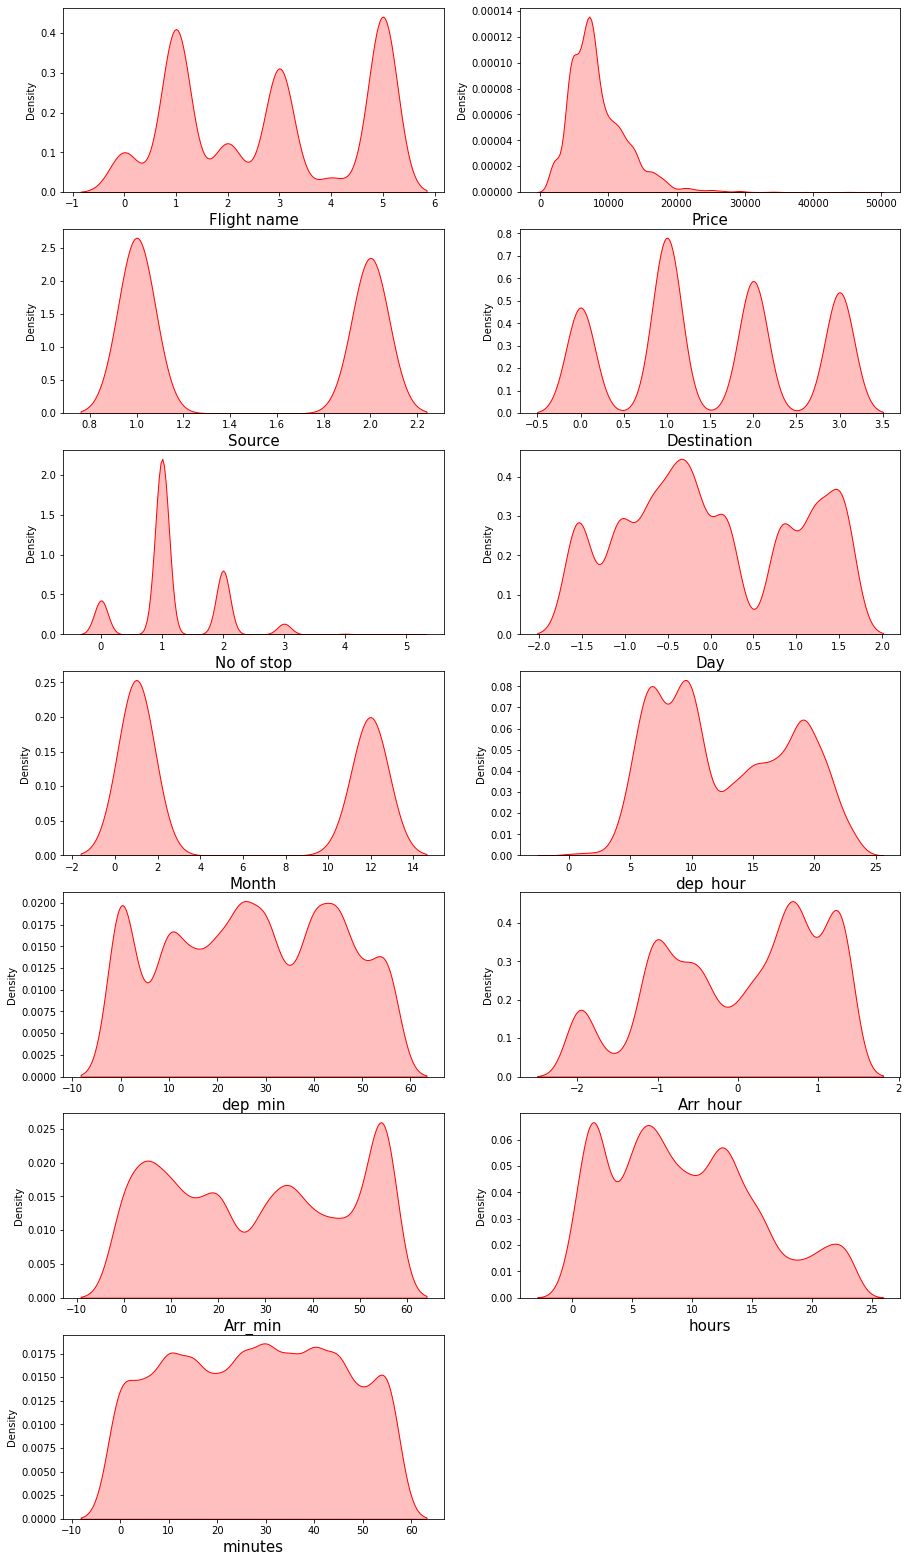

In [34]:
#univariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show

all column is norammlly distributed except price which is target column

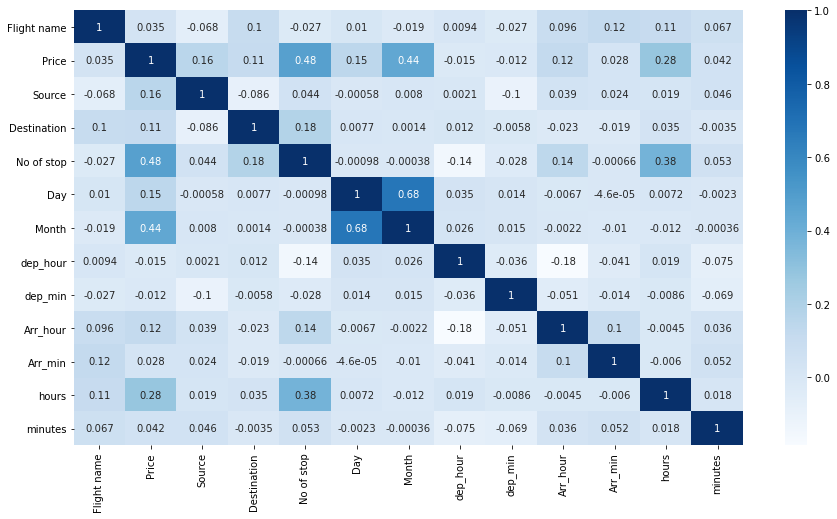

In [36]:
#multivariate analysis
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True,cmap = "Blues")
plt.show()

month and day is showing good correlation

### Dividing data into X and Y

In [37]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [38]:
x.shape

(9533, 12)

In [39]:
y.shape

(9533,)

### scaling X values

In [40]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [41]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [42]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000
mean,0.554768,0.469527,0.500822,0.237554,0.501905,0.444380,0.551384,0.491565,0.603935,0.515778,0.402351,0.504039
std,0.351583,0.499097,0.349336,0.139267,0.324639,0.495219,0.234784,0.314953,0.298791,0.347344,0.265463,0.308035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.333333,0.200000,0.272799,0.000000,0.347826,0.181818,0.343523,0.181818,0.173913,0.272727
50%,0.600000,0.000000,0.333333,0.200000,0.440491,0.000000,0.478261,0.454545,0.660069,0.545455,0.347826,0.545455
75%,1.000000,1.000000,0.666667,0.400000,0.771516,1.000000,0.782609,0.727273,0.851927,0.818182,0.565217,0.727273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scalled

### Spliting Train and Test data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [45]:
x_train.shape

(6959, 12)

In [46]:
x_test.shape

(2574, 12)

In [47]:
y_train.shape

(6959,)

In [48]:
y_test.shape

(2574,)

## Model building

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### LinearRegression

In [50]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.510709789615863


In [51]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 8822937.400728585
MAE: 2078.0947096872237
r2_score: 0.03245783159522686


### RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9802585092835834


In [53]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 2566561.6687980294
MAE: 818.7154218962318
r2_score: 0.8231427853471597


### DecisionTreeRegressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9981169063509563


In [55]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 4380621.720437171
MAE: 938.9049015799017
r2_score: 0.736083409205494


### GradientBoostingRegressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.7791483846845925


In [57]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 4506234.582324624
MAE: 1413.3550151886782
r2_score: 0.6080543777345048


### cross validation

In [58]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 9281533.807736, 3038198.607413
RF    : 5317458.029378, 2093945.775327
DTR    : 10065262.222992, 2974693.833236
GBR    : 5495365.905666, 1671668.685387


### -Accourding to all metrics score selecting the RandomForestRegressor for GridSeachCV
### HYPER PARAMETER TUNING:
### GridSearchCV
### RandomForestRegressor

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
RF=RandomForestRegressor()
param={
     'criterion':['mse','mae'],
    'n_estimators':[100, 200],
    'max_depth':[1],
   'max_features' : ["sqrt", "log2",],
}

In [61]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [62]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


In [63]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [64]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 2566561.6687980294
MAE: 818.7154218962318
r2_score: 0.8231427853471597


<AxesSubplot:xlabel='Price', ylabel='Density'>

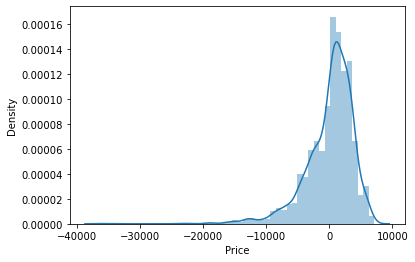

In [65]:
sns.distplot(RF_grid_pred-y_test)

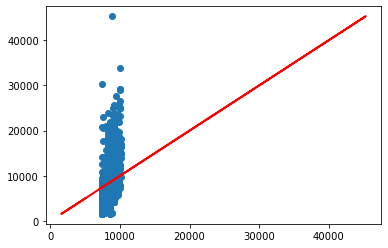

In [66]:
plt.scatter(RF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

### saving the model

In [67]:
import joblib

In [68]:
joblib.dump(RF_grid.best_estimator_,'Flight_Price_Pediction_Model building.obj')

['Flight_Price_Pediction_Model building.obj']